<a href="https://colab.research.google.com/github/nsys-kusan/aibu-20220119/blob/main/%E3%82%84%E3%81%BE%E3%81%8C%E3%81%9FAI%E9%83%A8%E3%80%80%E4%BC%81%E6%A5%AD%E8%A6%96%E5%AF%9F%E3%80%80%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E4%BD%93%E9%A8%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **■やまがたAI部　企業視察　ディープラーニング体験**

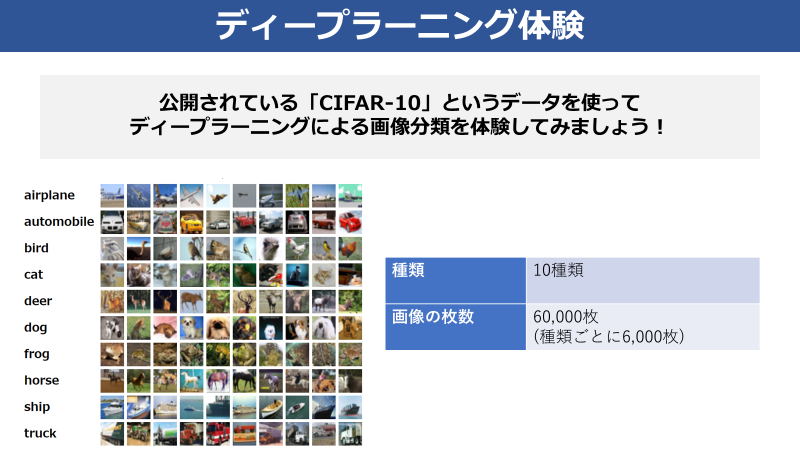

# ■STEP1. CIFAR-10 データセットのダウンロード

自分でデータを集めるのも良いのですが、大変なので、インターネット上で公開されているデータセットを利用します。

CIFAR-10という有名なデータセットです。


---



In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("CIFAR-10 データセットをダウンロードしました")

# ■STEP2. CIFAR-10 データセットの内容確認

使う前に、データの内容を調べます。

どんなデータなのか？に合わせて、作るAIも変わってきます。



---





# データの形の確認

In [ ]:
print("教師データの個数")
print(X_train.shape)
print(y_train.shape)

print("検証データの個数")
print(X_test.shape)
print(y_test.shape)

---

# データを可視化してみる

In [ ]:
import matplotlib.pyplot as plt

# X_trainの0番目のデータを表示
plt.imshow(X_train[0])
plt.show() 

In [ ]:
# y_trainの0番目のデータを表示
print(y_train[0])

---

## ランダムに30個を描画してみる

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 描画するデータの抽出
pickup = np.random.randint(0, X_train.shape[0], 30)
X_train_pickup = X_train[pickup]
y_train_pickup = y_train[pickup]

# データの描画
plt.figure(figsize=(15,5))
for index, img in enumerate(X_train_pickup):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(y_train_pickup[index][0])
plt.show()


---
## ラベルを表示してみる


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ラベルの定義
cifar10_labels = [
    'airplane',     # 0
    'automobile',   # 1
    'bird',         # 2
    'cat',          # 3
    'deer',         # 4
    'dog',          # 5
    'frog',         # 6
    'horse',        # 7
    'ship',         # 8
    'truck'         # 9
]

# 描画するデータの抽出
pickup = np.random.randint(0, X_train.shape[0], 30)
X_train_pickup = X_train[pickup]
y_train_pickup = y_train[pickup]

# データの描画
plt.figure(figsize=(15,5))
for index, img in enumerate(X_train_pickup):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[y_train_pickup[index][0]])
plt.show()


---
## ラベルを日本語にしてみる

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 日本語表示のオマジナイ
!pip install japanize-matplotlib > /dev/null
import japanize_matplotlib
japanize_matplotlib.japanize()

# ラベルの定義
cifar10_labels = [
    '飛行機',   # 0
    '自動車',   # 1
    '鳥',       # 2
    '猫',       # 3
    '鹿',       # 4
    '犬',       # 5
    'カエル',   # 6
    '馬',       # 7
    '船',       # 8
    'トラック'  # 9
]

# 描画するデータの抽出
pickup = np.random.randint(0, X_train.shape[0], 30)
X_train_pickup = X_train[pickup]
y_train_pickup = y_train[pickup]

# データの描画
plt.figure(figsize=(15,5))
for index, img in enumerate(X_train_pickup):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[y_train_pickup[index][0]])
plt.show()

# ■STEP3. データの前処理


---



## 元々のデータの分布を見てみる

In [ ]:
import pandas as pd
pd.DataFrame(pd.Series(X_train.ravel()).describe()).transpose()



---
## データの分布を0～1の範囲に収める(正規化)


In [ ]:
X_train_pp = X_train.astype('float32') / 255
X_test_pp = X_test.astype('float32') / 255

In [ ]:
import pandas as pd
pd.DataFrame(pd.Series(X_train_pp.ravel()).describe()).transpose()

---

## クラスのone-hot-vector化


In [ ]:
from keras.utils import np_utils
y_train_pp = np_utils.to_categorical(y_train, 10)
y_test_pp = np_utils.to_categorical(y_test, 10)

In [ ]:
print("元のデータ(10個抜粋)")
print(y_train[:10])
print("one-hot-vector化したデータ(10個抜粋)")
print(y_train_pp[:10])

# ■STEP4. ニューラルネットワークの学習


---


## ニューラルネットワークの定義

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

## ニューラルネットワークの学習

In [ ]:
history = model.fit(
    X_train_pp,
    y_train_pp,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[]
)

## 学習結果の表示

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(history.history['loss'],label='loss',color='r')
#plt.plot(history.history['val_loss'],label='val_loss',color='b')
plt.plot(history.history['accuracy'],label='教師データの正解率',color='pink')
plt.plot(history.history['val_accuracy'],label='検証データの正解率',color='skyblue')
plt.legend()
plt.xlabel('エポック数')
plt.ylabel('正解率')
plt.show()

# ■STEP5. ニューラルネットワークのテスト


---


In [ ]:
X_test[0]